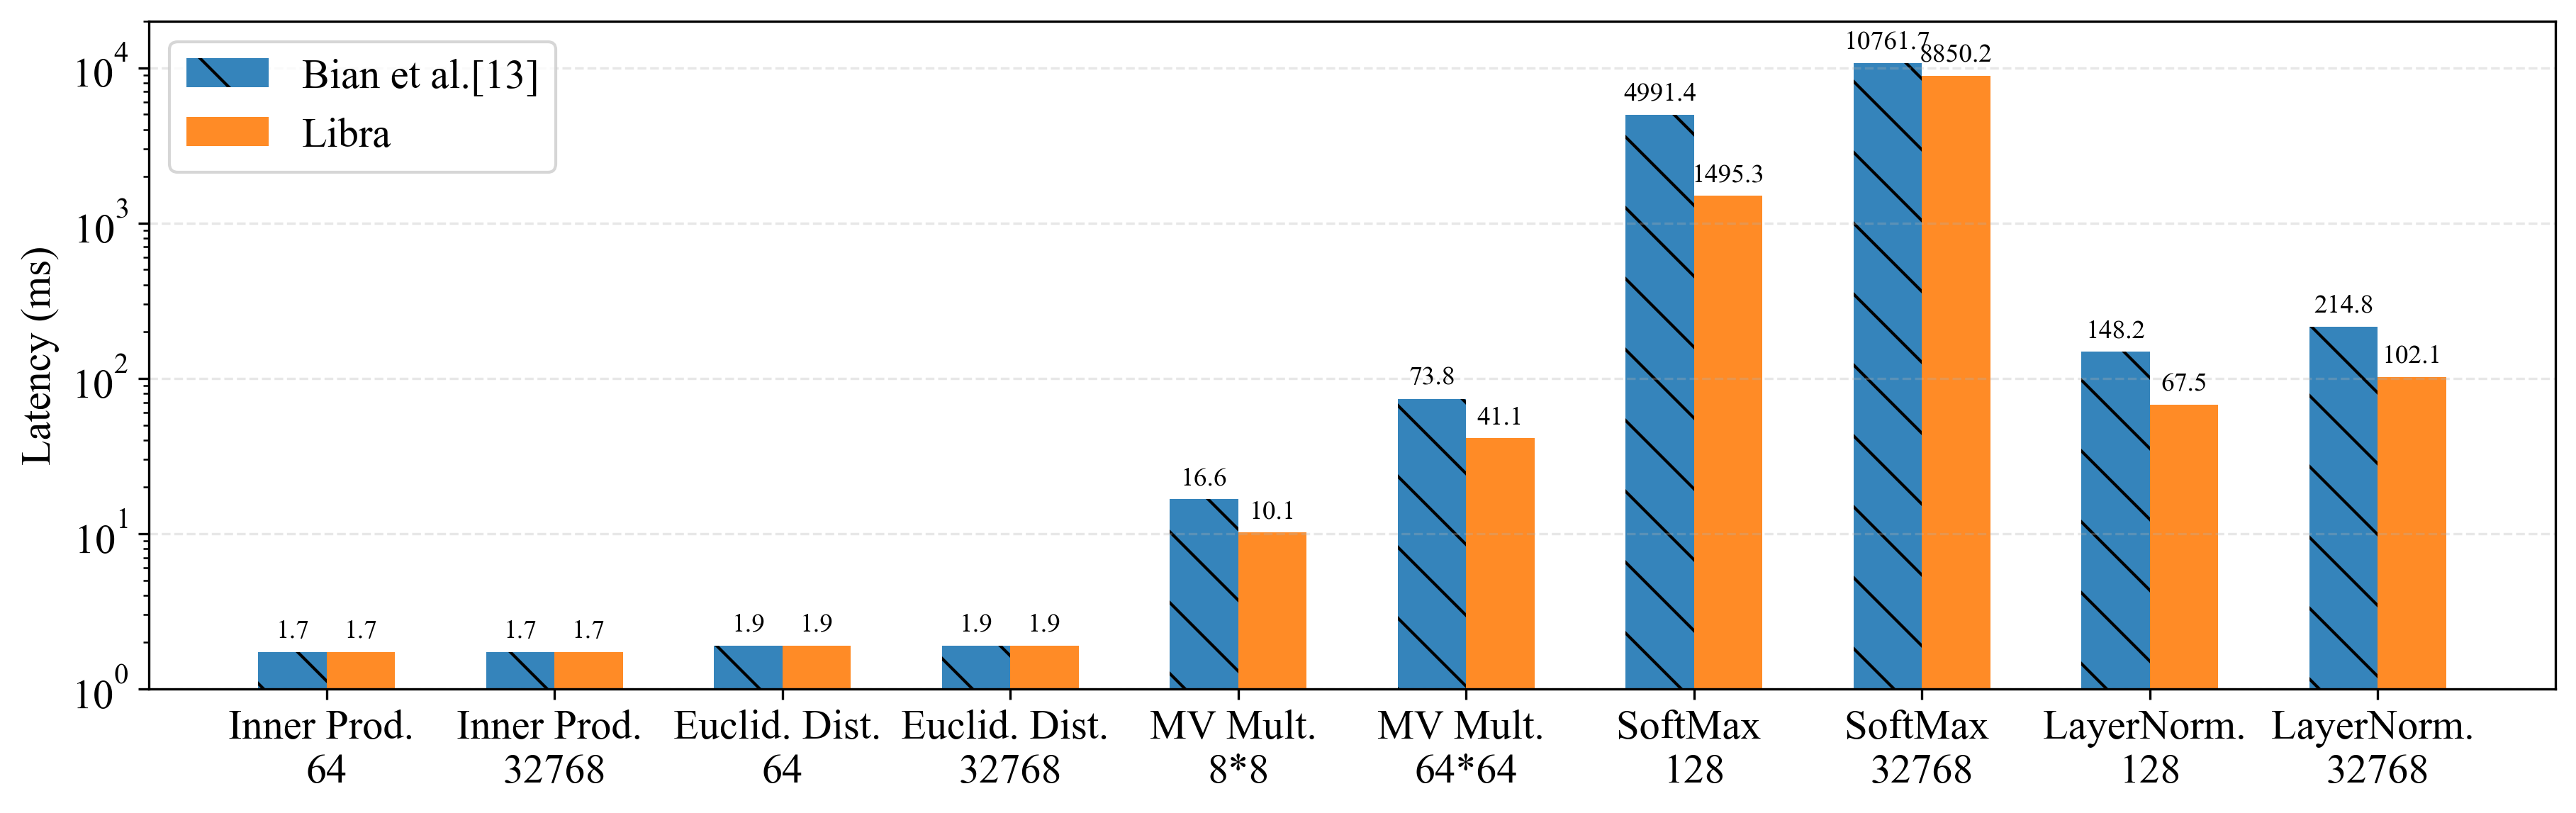

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# config = {
#     "font.family": "Times New Roman",
#     "mathtext.fontset": "custom",
#     "mathtext.rm": "Times New Roman",
#     "axes.unicode_minus": False,
#     "axes.titlesize": 10,
#     "axes.labelsize": 10,
#     "xtick.labelsize": 9,
#     "ytick.labelsize": 9,
#     "legend.fontsize": 9,
#     "grid.alpha": 0.3
# }
config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 14,
    "axes.labelsize": 14,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "grid.alpha": 0.3
}
rcParams.update(config)


# 数据准备
experiments = (
    "Inner Prod. \n64", "Inner Prod. \n32768", 
    "Euclid. Dist. \n64", "Euclid. Dist. \n32768", 
    "MV Mult. \n8*8", "MV Mult. \n64*64", 
    "SoftMax \n128", "SoftMax \n32768", 
    "LayerNorm. \n128", "LayerNorm. \n32768"
)

# 处理数据中的逗号分隔符
libra_data = [1.72794, 1.72794, 1.89794, 1.89794, 10.12336978,	41.06534942,
              1495.252006, 8850.19, 67.5281963, 102.0736699]  # 将8,850.19改为8850.19

hand_data = [1.72794, 1.72794, 1.89794, 1.89794, 16.59612, 73.7514, 
             4991.424006, 10761.66592, 148.21274, 214.847464]

# 设置图表
x = np.arange(len(experiments))  # 标签位置
width = 0.3  # 柱状图宽度

fig, ax = plt.subplots(figsize=(12, 6*0.618), dpi=300)
fig.set_constrained_layout(True)

# 绘制Hand和Libra的柱状图
# rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al. [11] ', hatch='\\')
# rects2 = ax.bar(x + width/2, libra_data, width, label='Libra')


hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 绘制Hand和Libra的柱状图
rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al.[13]', color=hand_color, alpha=0.9, hatch='\\')
rects2 = ax.bar(x + width/2, libra_data, width, label='Libra', color=libra_color, alpha=0.9)


# 添加数值标签
ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=9)
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=9)

# 设置标签、标题等
ax.set_ylabel('Latency (ms)')
# ax.set_title('Performance Comparison: Hand vs Libra')
ax.set_xticks(x, experiments)
ax.legend(loc='upper left')

# 设置对数纵坐标
ax.set_yscale('log')
ax.set_ylim(1, 20000)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局以确保所有元素可见
plt.savefig('fig/arith-microbenchmarks.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

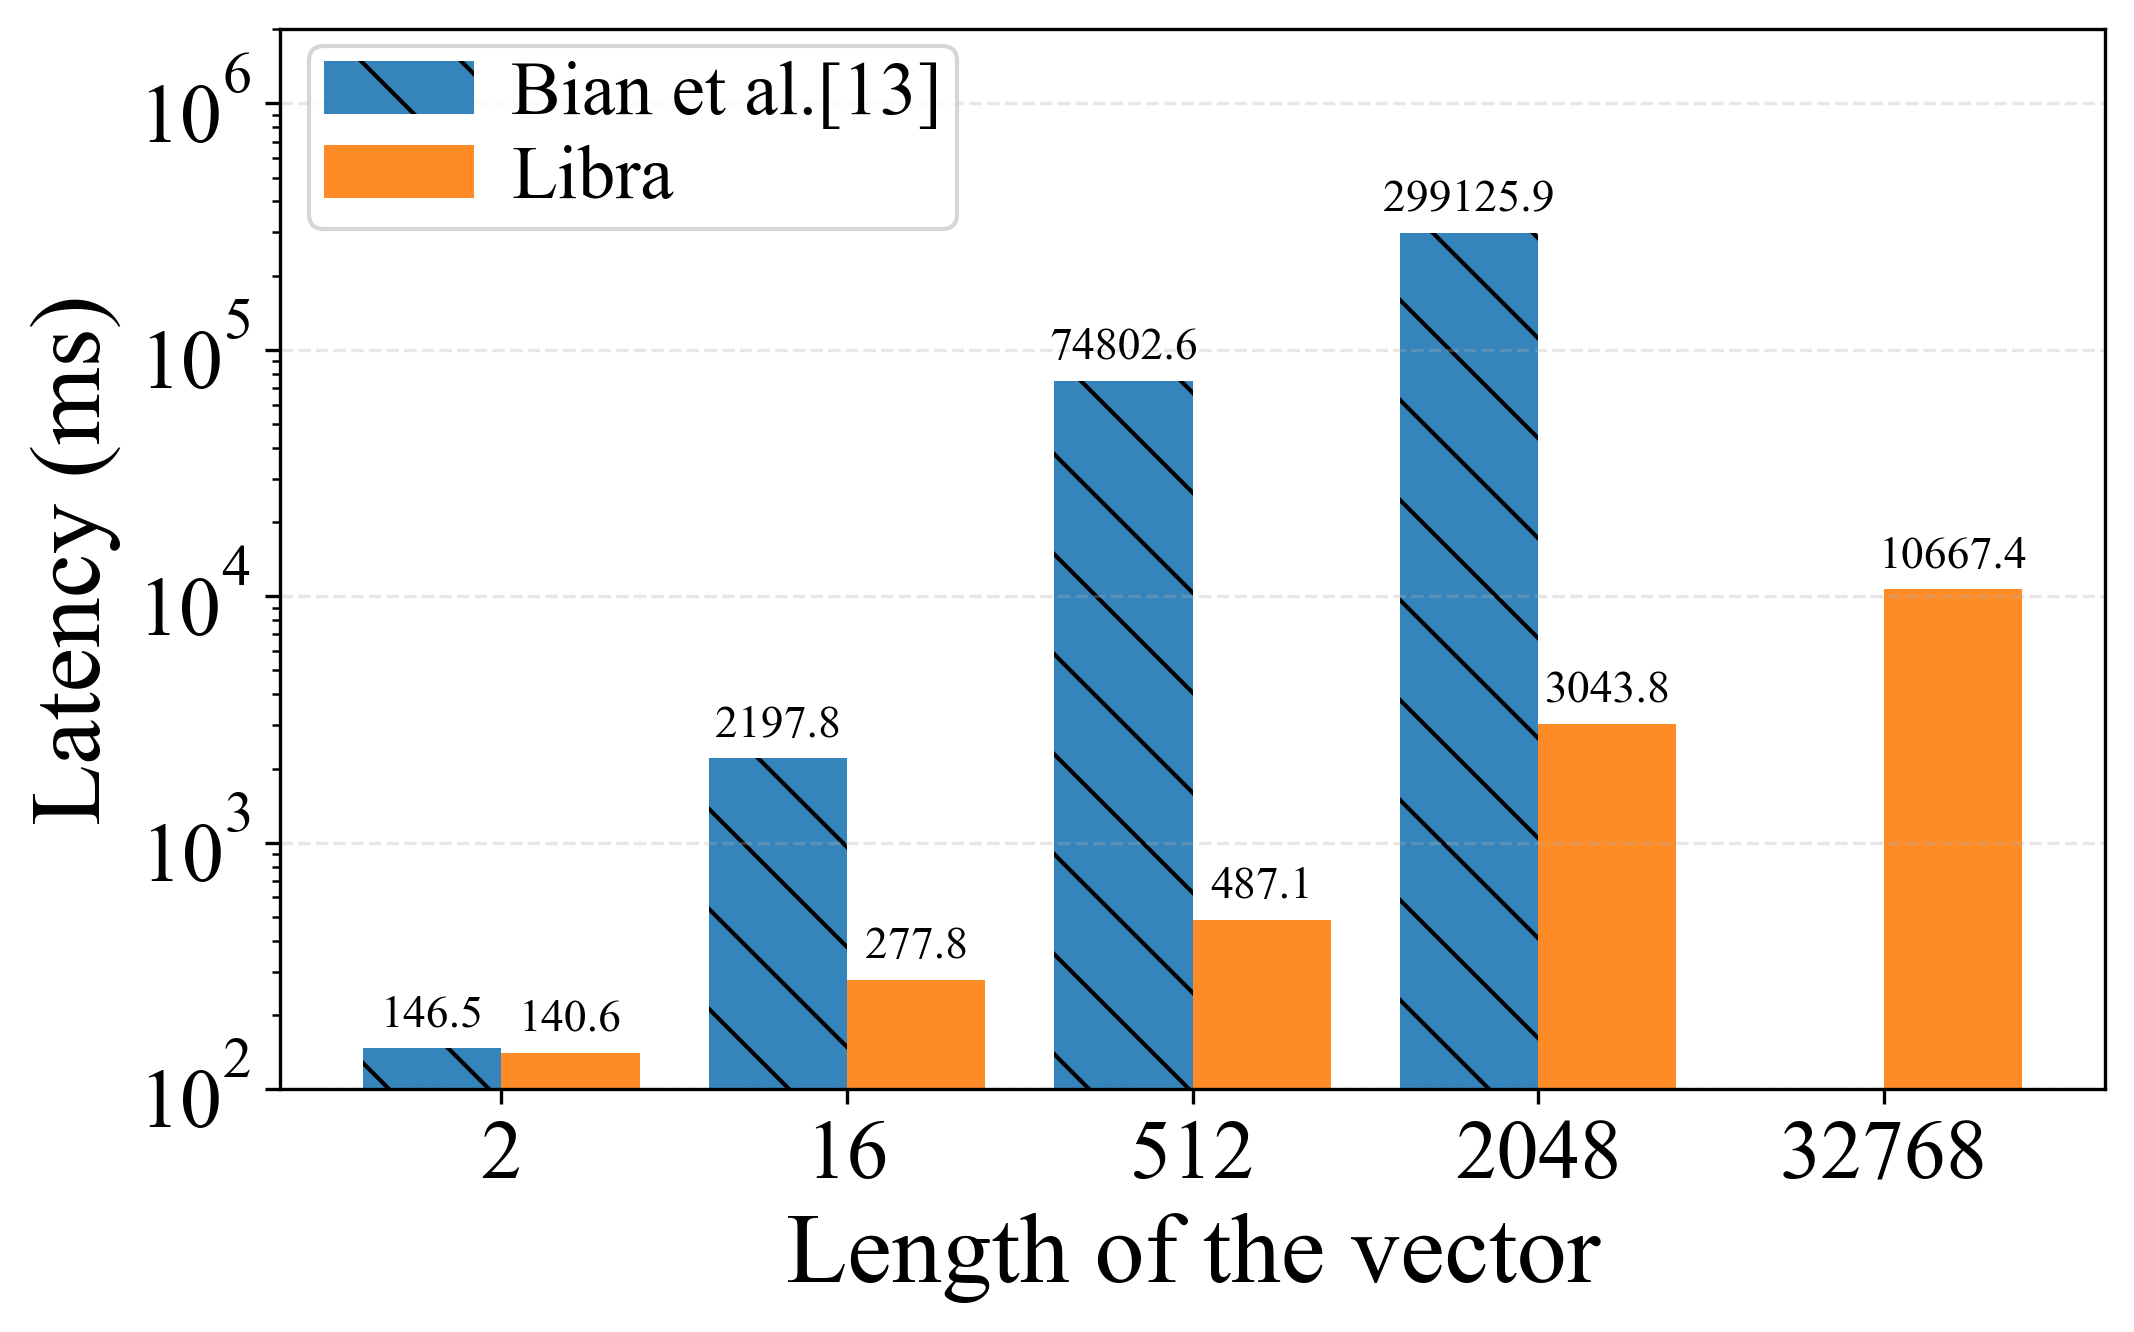

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "grid.alpha": 0.3
}
rcParams.update(config)

# 新数据准备
experiments = ("2", "16", "512", "2048", "32768")

# 处理数据中的逗号分隔符
libra_data = [140.6016, 277.75968, 487.12704, 3043.8432, 10667.41]  # 将10,667.41改为10667.41

# hand_data = [146.46, 2197.79, 74802.558, 299125.94, 4796053.36]
hand_data = [146.46, 2197.79, 74802.558, 299125.94, 1]

# 设置图表
x = np.arange(len(experiments))  # 标签位置
width = 0.4  # 柱状图宽度

fig, ax = plt.subplots(figsize=(7, 7*0.618), dpi=300)
fig.set_constrained_layout(True)

# 定义颜色
hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 绘制Hand和Libra的柱状图
rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al.[13]', color=hand_color, alpha=0.9, hatch='\\')
rects2 = ax.bar(x + width/2, libra_data, width, label='Libra', color=libra_color, alpha=0.9)

# 添加数值标签
ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=11)
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=11)

# 设置标签、标题等
ax.set_ylabel('Latency (ms)', fontsize=24)
ax.set_xlabel('Length of the vector', fontsize=24)
ax.set_xticks(x, experiments)
ax.legend(
    loc='upper left',
    ncol=1,  # 横向3列排列（不变）
    bbox_to_anchor=(-0.005, 1.02),  # 位置：左上角对齐坐标轴左上角，向上偏移2%（不变）
    frameon=True, 
    fontsize=18,  # 图例文字大小（不变，避免文字过大导致间距宽）
    
    # 1. 减小列间距（横向相邻图例项的距离）：默认2.0，改为1.0（可根据需求微调0.8~1.2）
    columnspacing=0.8, 
    # 2. 减小标记与文字的间距（彩色方块和“HEIR”文字的距离）：默认0.8，改为0.5
    handletextpad=0.5, 
    # 3. 减小图例边框内边距（图例边缘到内容的距离）：默认0.4，改为0.3
    borderpad=0.2, 
    # 4. （可选）减小图例项内部的纵向间距（横向排列时影响小，可保留默认）
    labelspacing=0.2
)

# 设置对数纵坐标
ax.set_yscale('log')
ax.set_ylim(100, 2000000)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局以确保所有元素可见
plt.savefig('fig/logic-Minimum.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

In [23]:
import numpy as np

data = np.array([146.46, 2197.79, 74802.558, 299125.94, 1])
data1 = data + data/2

print(data1)

[2.19690000e+02 3.29668500e+03 1.12203837e+05 4.48688910e+05
 1.50000000e+00]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "grid.alpha": 0.3
}
rcParams.update(config)

# 新数据准备
experiments = ("2", "16", "512", "2048", "32768")

# 处理数据中的逗号分隔符
libra_data = [140.6016, 277.75968, 487.12704, 3043.8432, 10667.41]  # 将10,667.41改为10667.41

hand_data = [219.69, 3296.68, 112203.83, 448688.91, 1]

# 设置图表
x = np.arange(len(experiments))  # 标签位置
width = 0.4  # 柱状图宽度

fig, ax = plt.subplots(figsize=(7, 7*0.618), dpi=300)
fig.set_constrained_layout(True)

# 定义颜色
hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 绘制Hand和Libra的柱状图
rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al. [11] ', color=hand_color, alpha=0.9, hatch='\\')
rects2 = ax.bar(x + width/2, libra_data, width, label='Libra', color=libra_color, alpha=0.9)

# 添加数值标签
ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=11)
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=11)

# 设置标签、标题等
ax.set_ylabel('Latency (ms)', fontsize=24)
ax.set_xlabel('Length of the vector', fontsize=24)
ax.set_xticks(x, experiments)
ax.legend(loc='upper left')

# 设置对数纵坐标
ax.set_yscale('log')
ax.set_ylim(100, 50000)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局以确保所有元素可见
plt.savefig('fig/logic-Minimum.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

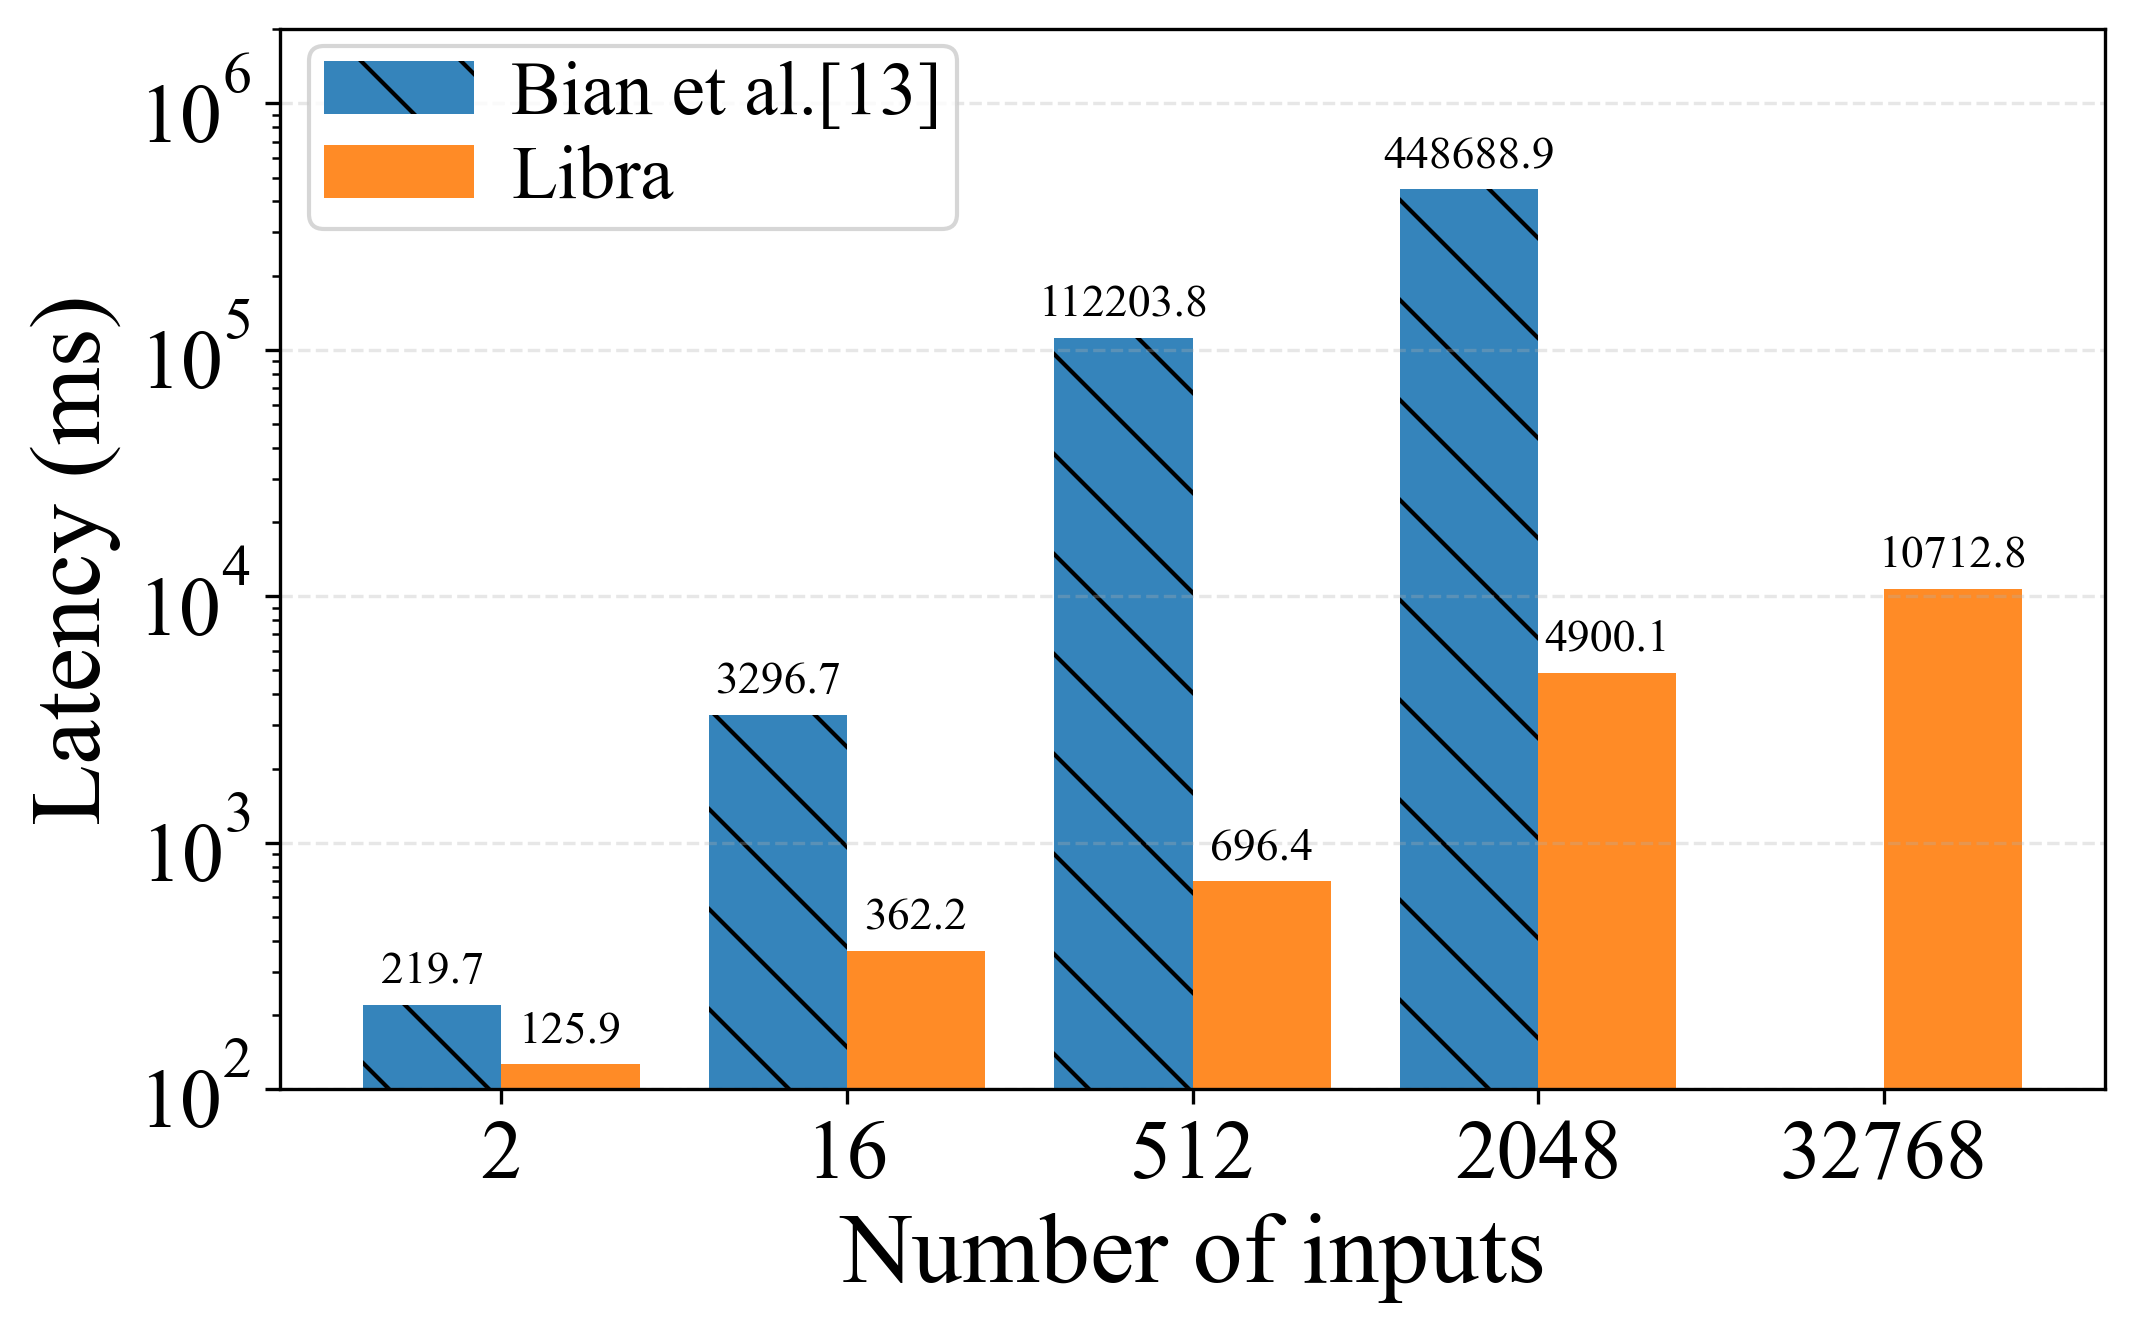

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "grid.alpha": 0.3
}
rcParams.update(config)

# 新数据准备
experiments = ("2", "16", "512", "2048", "32768")

# 更新数据
libra_data = [125.923072, 362.2372026, 696.389183, 4900.08945, 10712.80332]
# hand_data = [129.8176, 373.4408, 856.079, 5390.47, 38481.9]
hand_data = [219.69, 3296.68, 112203.83, 448688.91, 1]
# 设置图表
x = np.arange(len(experiments))  # 标签位置
width = 0.4  # 柱状图宽度

fig, ax = plt.subplots(figsize=(7, 7*0.618), dpi=300)
fig.set_constrained_layout(True)

# 定义颜色
hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 绘制Hand和Libra的柱状图
rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al.[13]', color=hand_color, alpha=0.9, hatch='\\')
rects2 = ax.bar(x + width/2, libra_data, width, label='Libra', color=libra_color, alpha=0.9)

# 添加数值标签
ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=11)
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=11)

# 设置标签、标题等
ax.set_ylabel('Latency (ms)', fontsize=24)
ax.set_xlabel('Number of inputs', fontsize=24)
ax.set_xticks(x, experiments)
ax.legend(
    loc='upper left',
    ncol=1,  # 横向3列排列（不变）
    bbox_to_anchor=(-0.005, 1.02),  # 位置：左上角对齐坐标轴左上角，向上偏移2%（不变）
    frameon=True, 
    fontsize=18,  # 图例文字大小（不变，避免文字过大导致间距宽）
    
    # 1. 减小列间距（横向相邻图例项的距离）：默认2.0，改为1.0（可根据需求微调0.8~1.2）
    columnspacing=0.8, 
    # 2. 减小标记与文字的间距（彩色方块和“HEIR”文字的距离）：默认0.8，改为0.5
    handletextpad=0.5, 
    # 3. 减小图例边框内边距（图例边缘到内容的距离）：默认0.4，改为0.3
    borderpad=0.2, 
    # 4. （可选）减小图例项内部的纵向间距（横向排列时影响小，可保留默认）
    labelspacing=0.2
)

# 设置对数纵坐标
ax.set_yscale('log')
ax.set_ylim(100, 2000000)
ax.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局以确保所有元素可见
plt.savefig('fig/logic-MinimumIndex.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

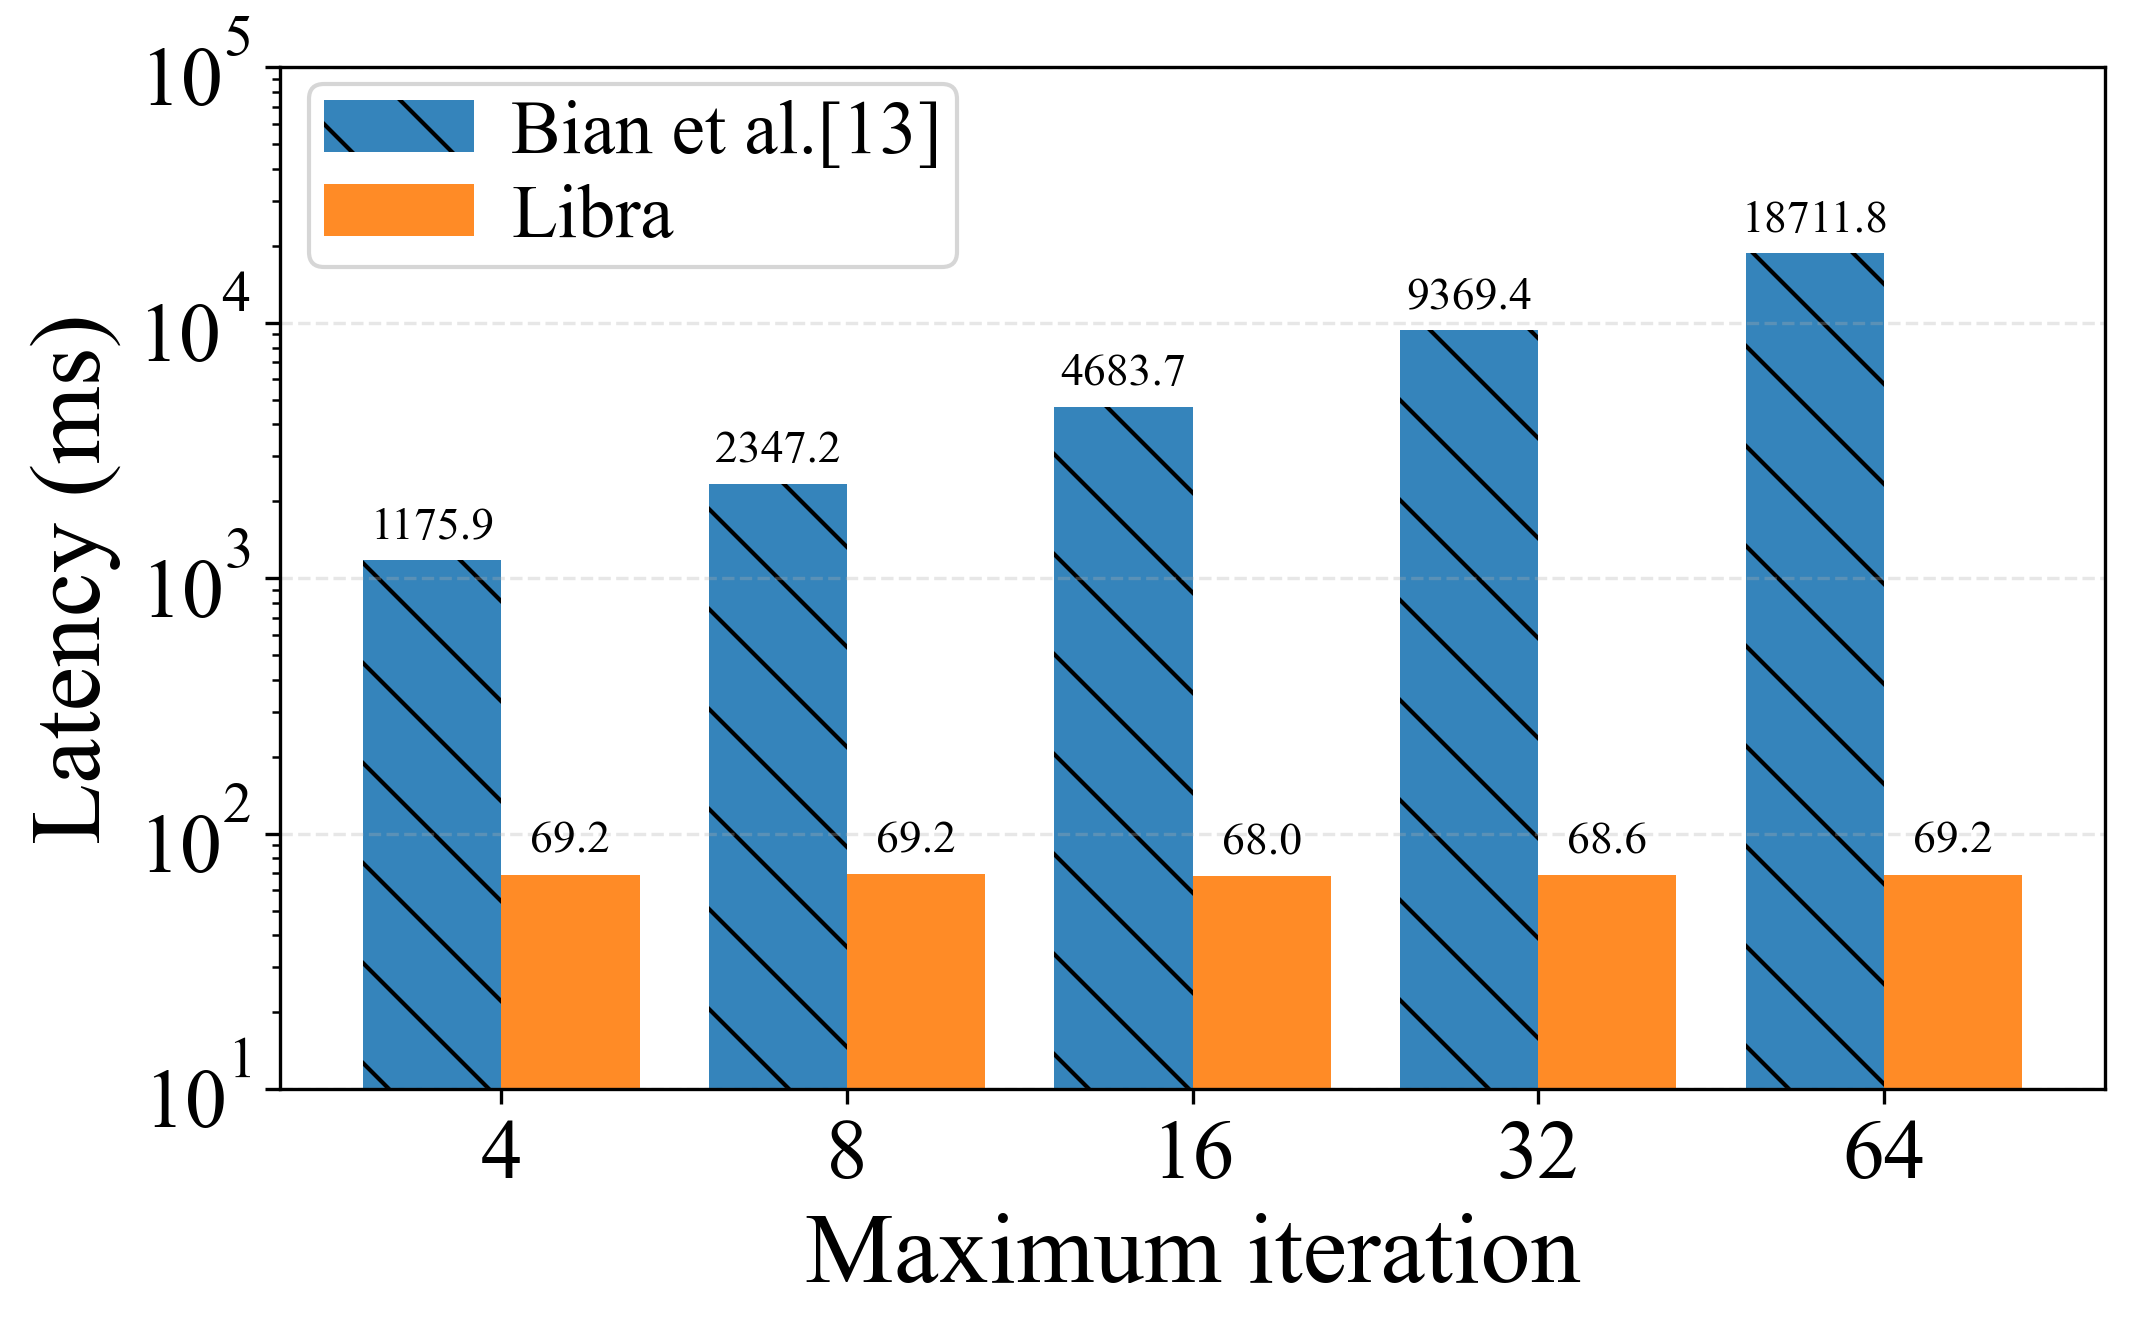

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "grid.alpha": 0.3
}
rcParams.update(config)

# 新数据准备 - 斐波那契数列
experiments = ("4", "8", "16", "32", "64")

# 更新数据
hand_data = [1175.899,	2347.175,		4683.712,	9369.40, 18711.85]
libra_data = [69.21087882,	69.24837405,	68.02866347,	68.6475949,	69.16072534]



# 设置图表
x = np.arange(len(experiments))  # 标签位置
width = 0.4  # 柱状图宽度

fig, ax = plt.subplots(figsize=(7, 7*0.618), dpi=300)
fig.set_constrained_layout(True)

# 定义颜色
hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 绘制Hand和Libra的柱状图
rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al.[13]', color=hand_color, alpha=0.9, hatch='\\')
rects2 = ax.bar(x + width/2, libra_data, width, label='Libra', color=libra_color, alpha=0.9)

# 添加数值标签
ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=11)  # 使用两位小数格式
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=11)  # 使用两位小数格式

# 设置标签、标题等
ax.set_ylabel('Latency (ms)', fontsize=24)
ax.set_xlabel('Maximum iteration', fontsize=24)
ax.set_xticks(x, experiments)
ax.legend(
    loc='upper left',
    ncol=1,  # 横向3列排列（不变）
    bbox_to_anchor=(-0.005, 1.02),  # 位置：左上角对齐坐标轴左上角，向上偏移2%（不变）
    frameon=True, 
    fontsize=18,  # 图例文字大小（不变，避免文字过大导致间距宽）
    
    # 1. 减小列间距（横向相邻图例项的距离）：默认2.0，改为1.0（可根据需求微调0.8~1.2）
    columnspacing=0.8, 
    # 2. 减小标记与文字的间距（彩色方块和“HEIR”文字的距离）：默认0.8，改为0.5
    handletextpad=0.5, 
    # 3. 减小图例边框内边距（图例边缘到内容的距离）：默认0.4，改为0.3
    borderpad=0.2, 
    # 4. （可选）减小图例项内部的纵向间距（横向排列时影响小，可保留默认）
    labelspacing=0.2
)

# 只设置对数纵坐标，其他保持不变
ax.set_yscale('log')
ax.set_ylim(10, 100000) 
# list = np.arange(60, 80, 1).tolist

# ax.set_ylim(list)

ax.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局以确保所有元素可见
plt.savefig('fig/logic-fibonacci.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

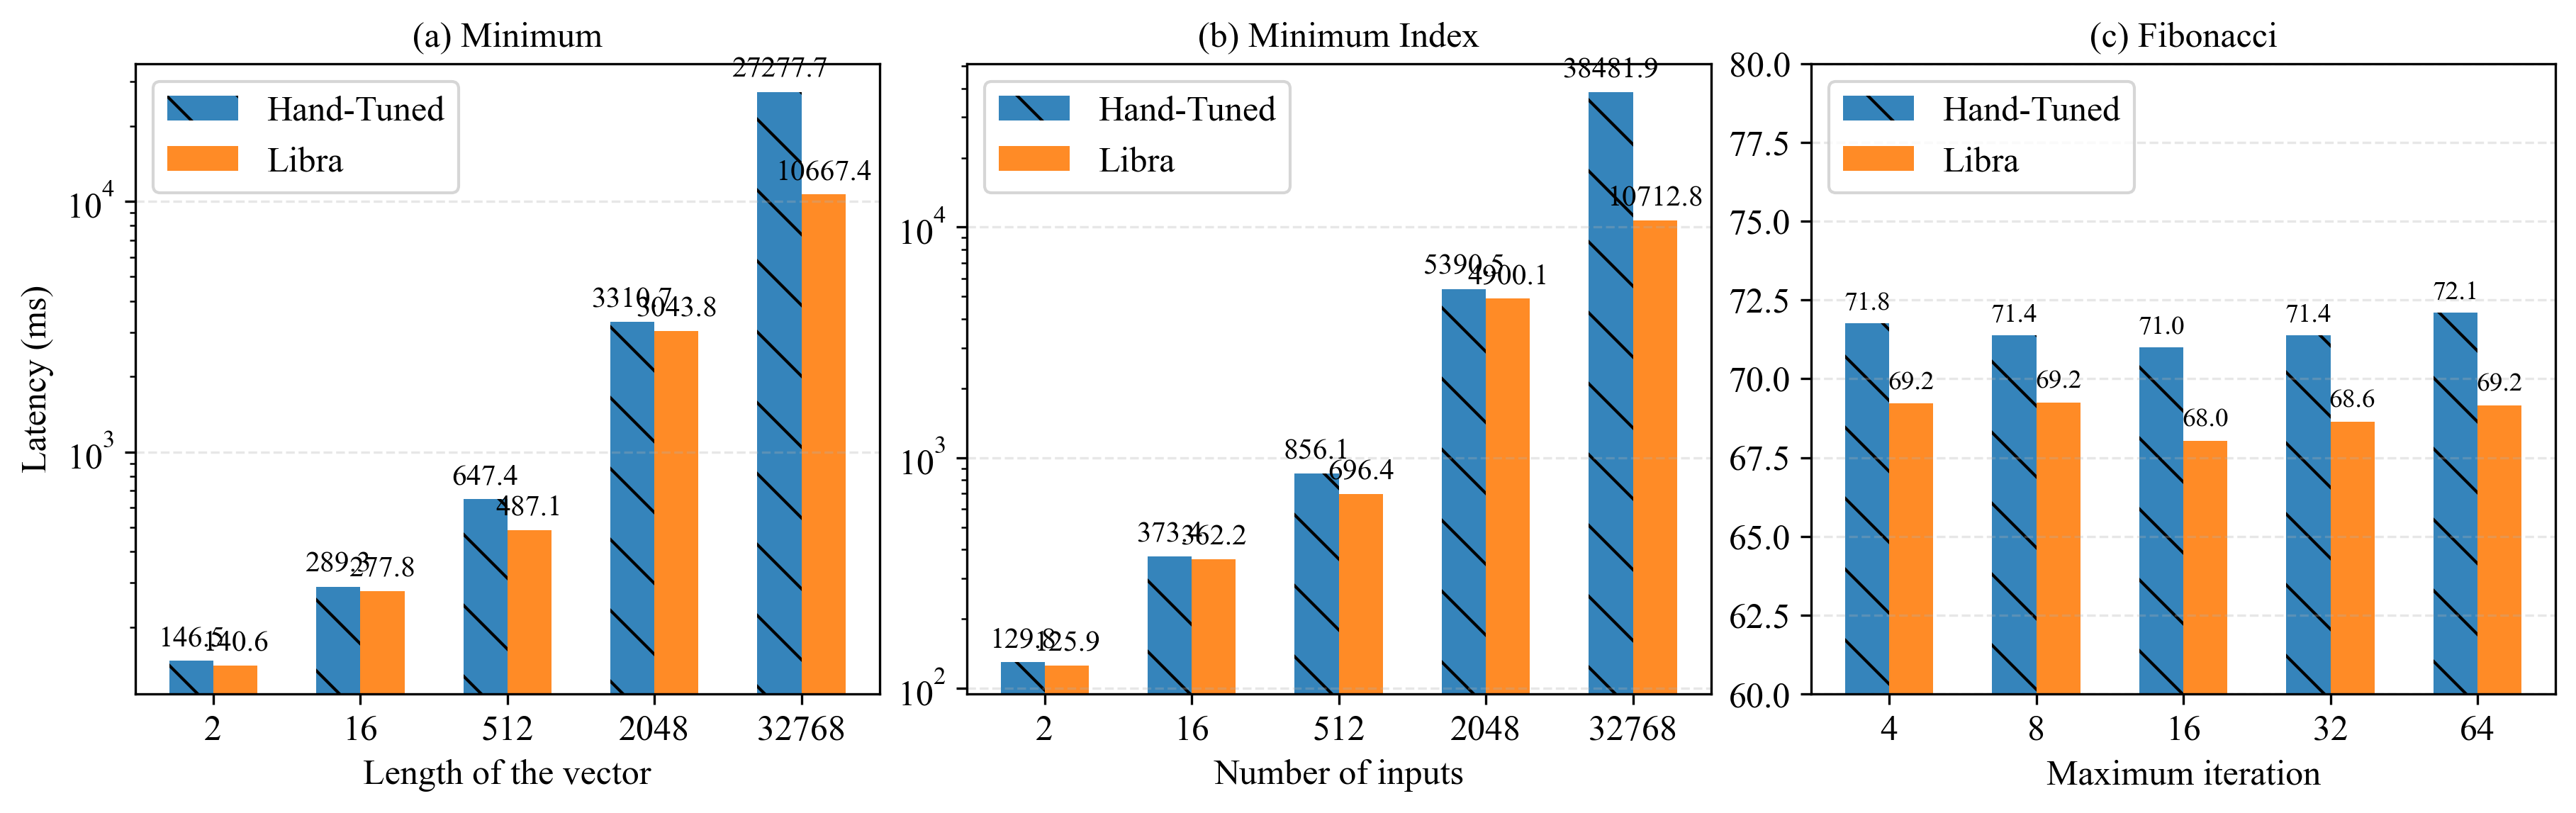

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置全局字体和样式
config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "grid.alpha": 0.3
}
rcParams.update(config)

# 创建包含三个子图的大图
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6*0.618), dpi=300)
fig.set_constrained_layout(True)

# 定义颜色
hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 第一个子图：Minimum
experiments1 = ("2", "16", "512", "2048", "32768")
libra_data1 = [140.6016, 277.75968, 487.12704, 3043.8432, 10667.41]
hand_data1 = [146.46, 289.33, 647.42, 3310.67, 27277.70]
x1 = np.arange(len(experiments1))
width = 0.3

rects1_1 = ax1.bar(x1 - width/2, hand_data1, width, label='Bian et al. [11] ', color=hand_color, alpha=0.9, hatch='\\')
rects1_2 = ax1.bar(x1 + width/2, libra_data1, width, label='Libra', color=libra_color, alpha=0.9)
ax1.bar_label(rects1_1, padding=3, fmt='%.1f', fontsize=10)
ax1.bar_label(rects1_2, padding=3, fmt='%.1f', fontsize=10)
ax1.set_ylabel('Latency (ms)')
ax1.set_xlabel('Length of the vector')
ax1.set_xticks(x1, experiments1)
ax1.legend(loc='upper left')
ax1.set_yscale('log')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_title('(a) Minimum')

# 第二个子图：Minimum Index
experiments2 = ("2", "16", "512", "2048", "32768")
libra_data2 = [125.923072, 362.2372026, 696.389183, 4900.08945, 10712.80332]
hand_data2 = [129.8176, 373.4408, 856.079, 5390.47, 38481.9]
x2 = np.arange(len(experiments2))

rects2_1 = ax2.bar(x2 - width/2, hand_data2, width, label='Bian et al. [11] ', color=hand_color, alpha=0.9, hatch='\\')
rects2_2 = ax2.bar(x2 + width/2, libra_data2, width, label='Libra', color=libra_color, alpha=0.9)
ax2.bar_label(rects2_1, padding=3, fmt='%.1f', fontsize=10)
ax2.bar_label(rects2_2, padding=3, fmt='%.1f', fontsize=10)
# ax2.set_ylabel('Latency (ms)')
ax2.set_xlabel('Number of inputs')
ax2.set_xticks(x2, experiments2)
ax2.legend(loc='upper left')
ax2.set_yscale('log')
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.set_title('(b) Minimum Index')

# 第三个子图：Fibonacci
experiments3 = ("4", "8", "16", "32", "64")
hand_data3 = [71.769136, 71.372848, 71.00416, 71.369472, 72.098384]
libra_data3 = [69.21087882, 69.24837405, 68.02866347, 68.6475949, 69.16072534]
x3 = np.arange(len(experiments3))

rects3_1 = ax3.bar(x3 - width/2, hand_data3, width, label='Bian et al. [11] ', color=hand_color, alpha=0.9, hatch='\\')
rects3_2 = ax3.bar(x3 + width/2, libra_data3, width, label='Libra', color=libra_color, alpha=0.9)
ax3.bar_label(rects3_1, padding=3, fmt='%.1f', fontsize=9)
ax3.bar_label(rects3_2, padding=3, fmt='%.1f', fontsize=9)
# ax3.set_ylabel('Latency (ms)')
ax3.set_xlabel('Maximum iteration')
ax3.set_xticks(x3, experiments3)
ax3.legend(loc='upper left')
ax3.set_ylim(60, 80)
ax3.grid(axis='y', linestyle='--', alpha=0.3)
ax3.set_title('(c) Fibonacci')

# 调整布局并保存
plt.savefig('fig/combined_logic_plots.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

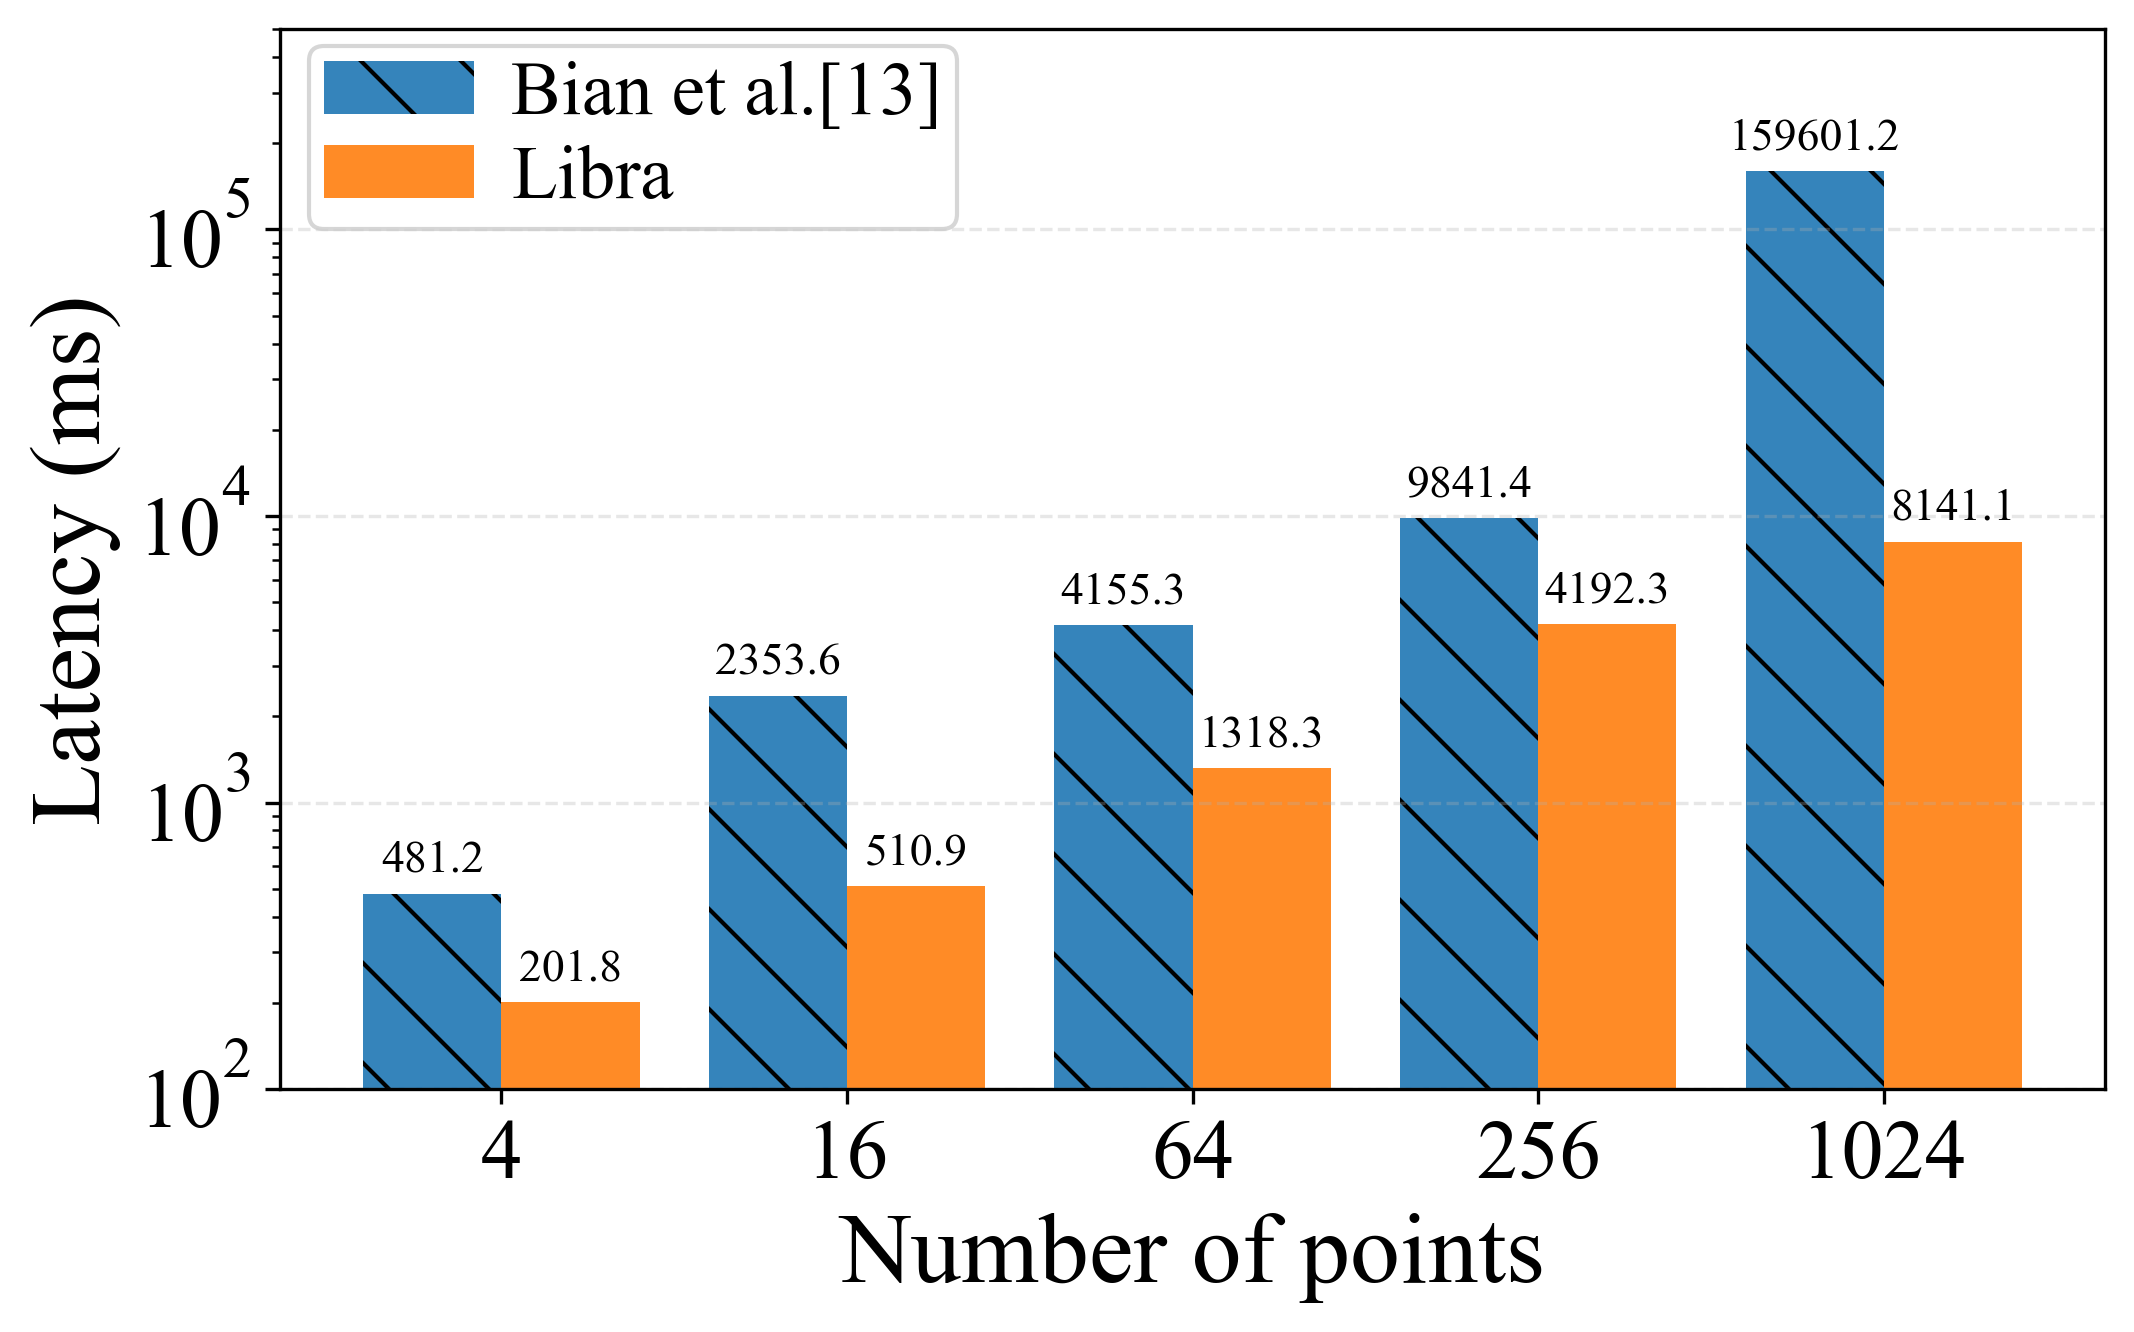

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "grid.alpha": 0.3
}
rcParams.update(config)

# 新数据准备 - 欧几里得距离最小化
experiments = ("4", "16", "64", "256", "1024")

# 更新数据
libra_data = [201.8485928, 510.8873712, 1318.307485, 4192.293939, 8141.082669]
hand_data = [481.1891, 2353.59, 4155.265, 9841.3685, 159601.217]

# 设置图表
x = np.arange(len(experiments))  # 标签位置
width = 0.4  # 柱状图宽度

fig, ax = plt.subplots(figsize=(7, 7*0.618), dpi=300)
fig.set_constrained_layout(True)

# 定义颜色
hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 绘制Hand和Libra的柱状图
rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al.[13]', color=hand_color, alpha=0.9, hatch='\\')
rects2 = ax.bar(x + width/2, libra_data, width, label='Libra', color=libra_color, alpha=0.9)

# 添加数值标签
ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=11)
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=11)

# 设置标签、标题等
ax.set_ylabel('Latency (ms)', fontsize=24)
ax.set_xlabel('Number of points', fontsize=24)
ax.set_xticks(x, experiments)
ax.legend(
    loc='upper left',
    ncol=1,  # 横向3列排列（不变）
    bbox_to_anchor=(-0.005, 1.02),  # 位置：左上角对齐坐标轴左上角，向上偏移2%（不变）
    frameon=True, 
    fontsize=18,  # 图例文字大小（不变，避免文字过大导致间距宽）
    
    # 1. 减小列间距（横向相邻图例项的距离）：默认2.0，改为1.0（可根据需求微调0.8~1.2）
    columnspacing=0.8, 
    # 2. 减小标记与文字的间距（彩色方块和“HEIR”文字的距离）：默认0.8，改为0.5
    handletextpad=0.5, 
    # 3. 减小图例边框内边距（图例边缘到内容的距离）：默认0.4，改为0.3
    borderpad=0.2, 
    # 4. （可选）减小图例项内部的纵向间距（横向排列时影响小，可保留默认）
    labelspacing=0.2
)

# 设置对数纵坐标
ax.set_yscale('log')

# 设置y轴范围
ax.set_ylim(100, 500000)  # 根据数据范围设置合适的y轴范围

ax.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局以确保所有元素可见
plt.savefig('fig/app-min_euclid_dist.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()

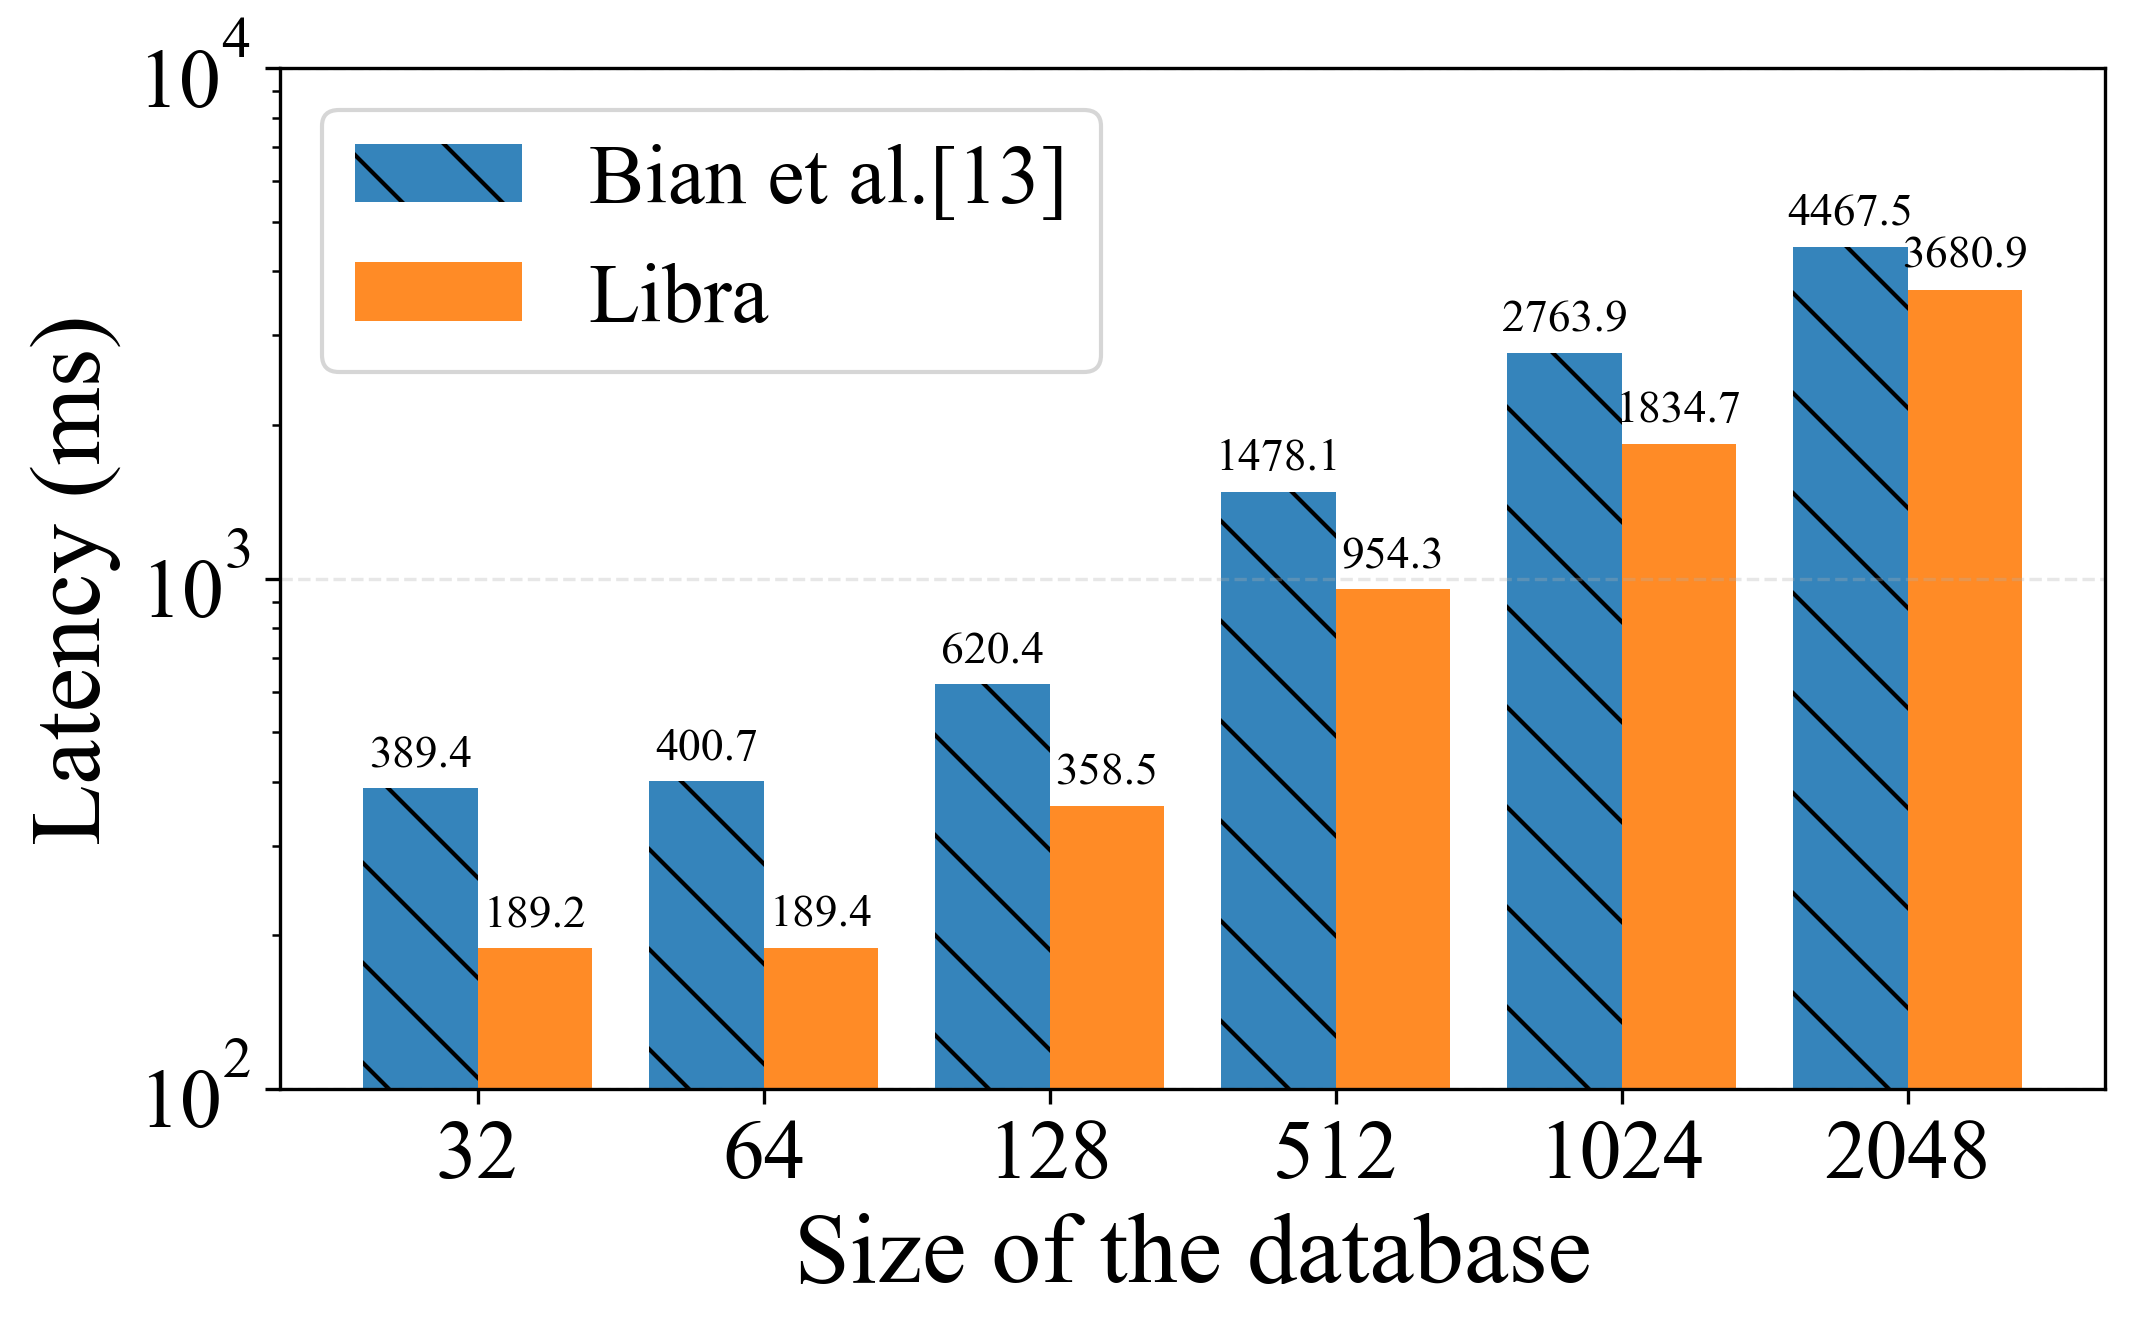

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

config = {
    "font.family": "Times New Roman",
    "mathtext.fontset": "custom",
    "mathtext.rm": "Times New Roman",
    "axes.unicode_minus": False,
    "axes.titlesize": 20,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "legend.fontsize": 20,
    "grid.alpha": 0.3
}
rcParams.update(config)

# 新数据准备 - 数据分析
experiments = ("32", "64", "128", "512", "1024", "2048")

# 更新数据
libra_data = [189.233272, 189.358384, 358.477628, 954.340536, 1834.701544, 3680.923984]
hand_data = [389.4230905, 400.6783086, 620.3905267, 1478.104745, 2763.869963, 4467.539181]

# 设置图表
x = np.arange(len(experiments))  # 标签位置
width = 0.4  # 柱状图宽度

fig, ax = plt.subplots(figsize=(7, 7*0.618), dpi=300)
fig.set_constrained_layout(True)

# 定义颜色
hand_color = '#1f77b4'  # 蓝色
libra_color = '#ff7f0e'  # 橙色

# 绘制Hand和Libra的柱状图
rects1 = ax.bar(x - width/2, hand_data, width, label='Bian et al.[13]', color=hand_color, alpha=0.9, hatch='\\')
rects2 = ax.bar(x + width/2, libra_data, width, label='Libra', color=libra_color, alpha=0.9)

# 添加数值标签
ax.bar_label(rects1, padding=3, fmt='%.1f', fontsize=11)
ax.bar_label(rects2, padding=3, fmt='%.1f', fontsize=11)

# 设置标签、标题等
ax.set_ylabel('Latency (ms)', fontsize=24)
ax.set_xlabel('Size of the database', fontsize=24)
ax.set_xticks(x, experiments)
ax.legend(loc='upper left')

# 设置对数纵坐标
ax.set_yscale('log')

# 设置y轴范围
ax.set_ylim(100, 10000)  # 根据数据范围设置合适的y轴范围

ax.grid(axis='y', linestyle='--', alpha=0.3)

# 调整布局以确保所有元素可见
plt.savefig('fig/app-data_analysis.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()